In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer

In [54]:
product_exc = pd.read_csv('content/Product_Exclusive_Classification.csv')
product_exc.head()

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
0,50,SEPHORA COLLECTION,no category,5.0,46.0,0.0,50.0,50.0,0
1,304,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
2,404,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
3,443,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
4,463,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0


# 1. DESCRIPTIVE ANALYTICS

Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil observasinya, seperti:

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)
* Untuk masing-masing jenis observasi, tuliskan juga jika tidak ada masalah, misal untuk A: “Semua tipe data sudah sesuai”

In [55]:
product_exc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


semua tipe data dan penamaan kolom sudah sesuai



## 1.1 Memeriksa missing value

In [56]:
print('Banyak missing value tiap kolom adalah\n')
product_exc.isnull().sum()

Banyak missing value tiap kolom adalah



id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64

Jadi, missing value terdapat pada kolom category dengan jumlah 13, rating dengan jumlah 95, number_of_review dengan jumlah 9, love dengan jumlah 34, price dengan jumlah 8, value_price dengan jumlah 17.

## 1.2 Kolom Statistics

In [57]:
cats = ['brand', 'category']
nums = ['rating', 'number_of_reviews', 'love', 'price', 'value_price']

### 1.2.1 Kolom Kategori

In [58]:
product_exc['brand']\
.value_counts()\
.to_frame('frekuensi_muncul')\
.reset_index()

,brand,frekuensi_muncul
0,SEPHORA COLLECTION,492
1,CLINIQUE,211
2,TOM FORD,150
3,tarte,143
4,Kiehl's Since 1851,122
...,...,...
305,Conture,1
306,Cocofloss,1
307,Makeup Eraser,1
308,Flora + Bast,1


In [62]:
product_exc['category']\
.value_counts()\
.to_frame('frekuensi_muncul')\
.reset_index()

,category,frekuensi_muncul
0,Perfume,619
1,Moisturizers,395
2,Face Serums,334
3,Value & Gift Sets,241
4,Face Wash & Cleansers,225
...,...,...
137,Powder Brush,1
138,Accessories,1
139,Lid Shadow Brush,1
140,Spa Tools,1


In [65]:
product_exc['exclusive']\
.value_counts()\
.to_frame('frekuensi_muncul')\
.reset_index()

,exclusive,frekuensi_muncul
0,0,5953
1,1,2047


### 1.2.2 Kolom Numerik

In [66]:
col_number = product_exc.select_dtypes(include = 'number')
col_number = col_number.drop(columns = ['id','exclusive']).columns
col_number

Index(['rating', 'number_of_reviews', 'love', 'price', 'value_price'], dtype='object')

In [67]:
product_exc.describe().T

,count,mean,std,min,25%,50%,75%,max
id,8000.0,1.910231e+06,385835.344819,50.0,1773379.0,2030360.0,2185074.0,2293801.0
rating,7905.0,4.085136e+00,0.761069,0.0,4.0,4.0,4.5,5.0
number_of_reviews,7991.0,3.035744e+02,931.724460,0.0,14.0,56.0,231.5,19000.0
love,7966.0,1.756396e+04,44253.391743,0.0,2000.0,5500.0,15300.0,1300000.0
price,7992.0,4.990093e+01,46.864764,2.0,24.0,35.0,59.0,549.0
value_price,7983.0,5.098330e+01,48.473049,2.0,24.0,35.0,60.0,549.0
exclusive,8000.0,2.558750e-01,0.436379,0.0,0.0,0.0,1.0,1.0


* terdapat keanehan pada kolom number of review dan love di mean dan std, dimana std yang sangat besar dibandingkan mean. Hal ini dikarenakan, data yang digunakan sangat bervariasi sehingga std besar.

### JAWABAN dan INTEPRETASI
A. Berdasarkan informasi diatas bahwa 9 fitur pada dataset ini telah sesuai tipe datanya. Terdapat 5 fitur bertipe float (rating, number_of_reviews, love, price, value_price),  2 fitur bertipe int (id, exclusive), 2 fitur bertipe object (brand, category)

B. Terdapat 6 fitur yang memiliki missing values yaitu category 13, rating 95, number_of_reviews 9, love 34, price 8, value_price 17

C. Terdapat keanehan pada beberapa kolom, yaitu pada fitur number_of_reviews, love, price, dan value price. Namun pada fitur number_of_reviews yang paling signifikan, pada fitur ini memiliki nilai mean 303.57 dan std 931.72 ini menunjukan bahwa ada variabilitas yang sangat besar dalam jumlah ulasan. Deviasi standar yang tinggi ini mengindikasikan bahwa data num_of_review tersebar luas dari nilai rata-rata, dan juga nilai median (56.00) yang jauh lebih rendah dari nilai mean menunjukkan bahwa distribusi ini skewed ke kanan.

# 2. UNIVARIATE ANALYSIS

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target).

Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb).

Jelaskan juga apa yang harus di-follow up saat data pre-processing.

In [69]:
import plotly.express as px
def histogram_plot(data, column, color):
    fig = px.histogram(
        data,
        x = column,
        marginal = 'box',
        color_discrete_sequence = [color],
        nbins = 50
    )

    fig.update_traces(
        marker_line_width = 1,
        marker_line_color = 'white'
    )

    fig.update_layout(
        plot_bgcolor = 'rgba(0,0,0,0)',
        title = dict(
            text= f"<b>Distribusi Kolom <span style='color:{color}'>{column.title()}</b><br><sup><sup>Data Penjualan</sup></sup>",
            font = dict(
                size = 28,
                color = '#757882'
            ),
            y = 0.92,
            x = 0.5
        ),
        yaxis = dict (
            title = '',
            showgrid = False,
            showline = False,
            showticklabels = False,
            zeroline = False,
        ),
        margin = dict (
            t = 80,
            b = 10,
            r = 20
        )
    )
    fig.show()

In [71]:
col_plot = ['rating', 'number_of_reviews', 'love', 'price', 'value_price']
color_plot = ['#FF7F3E', '#059212', '#E90074', '#4A249D', '#102C57']

for col, color in zip(col_plot, color_plot):
  histogram_plot(
      data = product_exc,
      column = col,
      color = color
  )

### INTEPRETASI

- Kolom Rating :
  - Kolom Rating menunjukkan data yang tersebar dari nilai 0 hingga 5. Sebagian besar nilai rating berada pada nilai 4 dan 5. Terdapat sedikit sekali data pada rating 0, 1, 2, dan 3.
  - Distribusi right-skewed : Mayoritas pelanggan memberikan rating yang tinggi (4 dan 5) terhadap produk yang dijual.
  - Rating yang rendah sangat jarang terjadi, menunjukkan kepuasan pelanggan yang tinggi secara umum.
  - Ada beberapa outliers pada nilai rating yang rendah, tetapi tidak banyak.

- Kolom number_of_reviews :
  - Distribusi right-skewed : Mayoritas produk menerima sedikit ulasan.
  - Beberapa produk populer menerima banyak ulasan, menunjukkan tingkat perhatian atau popularitas yang tinggi di antara pelanggan.
  - Ada banyak outliers pada jumlah ulasan yang tinggi, menunjukkan bahwa beberapa produk sangat populer dan menarik banyak ulasan.

- Kolom love :
  - Pada kolom love didapatkan hasil visualisasi right-skewed dimana banyaknya data ada di rentang kecil.
  - Outliers mencakup nilai "Love" yang mencapai lebih dari 1,2 juta, menunjukkan adanya produk yang sangat populer atau mendapat perhatian besar dari pengguna.

- Kolom price :
  - Pada kolom price didapatkan hasil visualisasi right-skewed dimana banyaknya data ada di rentang kecil (harga rendah), tetapi ada juga data yang harganya mahal.
  - Banyak outliers dengan nilai yang sangat tinggi, menunjukkan ada beberapa produk dengan harga yang jauh lebih tinggi dari rata-rata.

- Kolom value_price :
  - Distribusi right-skewed : Kebanyakan produk memiliki nilai Value_Price yang rendah.
  - Banyak outliers dengan nilai yang sangat tinggi, menunjukkan ada beberapa produk dengan Value_Price yang jauh lebih tinggi dari rata-rata.


In [73]:
# Menghitung distribusi kolom kategorikal (brand_
brand_counts = product_exc['brand'].value_counts().reset_index()
brand_counts.columns = ['brand', 'count']

bar_chart = px.bar(brand_counts, x='brand', y='count', title='Distribusi Jenis Brand', labels={'count': 'Jumlah', 'brand': 'Brand'})

bar_chart.show()

In [74]:
# Membatasi hanya 10 brand teratas
top_10_brands = brand_counts.head(10)

# Membuat bar chart untuk 10 brand teratas
bar_chart = px.bar(top_10_brands, x='brand', y='count', title='Distribusi Jenis Brand (Top 10)', labels={'count': 'Jumlah', 'brand': 'Brand'})
bar_chart.show()

In [75]:
# Menghitung distribusi kolom kategori (category)
category_counts = product_exc['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

bar_chart = px.bar(category_counts, x='category', y='count', title='Distribusi Jenis Category', labels={'count': 'Jumlah', 'category': 'category'})

bar_chart.show()

In [76]:
# Membatasi hanya 10 Category teratas
top_10_category = category_counts.head(10)

# Membuat bar chart untuk 10 category teratas
bar_chart = px.bar(top_10_category, x='category', y='count', title='Distribusi Jenis Category (Top 10)', labels={'count': 'Jumlah', 'category': 'Category'})
bar_chart.show()

In [77]:
categorical_columns = product_exc.select_dtypes(include=['object'])
categorical_columns.nunique()

brand       310
category    142
dtype: int64

### INTEPRETASI
- Pada kolom kategorikal brand dan category memiliki jumlah ketegori yang sangat banyak, yaitu terdapat 310 brand dan 142 jenis category produk.

# 3. MULTIVARIATE ANALYSIS

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang diajarkan di kelas). Tuliskan hasil observasinya, seperti:

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?

B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?
* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

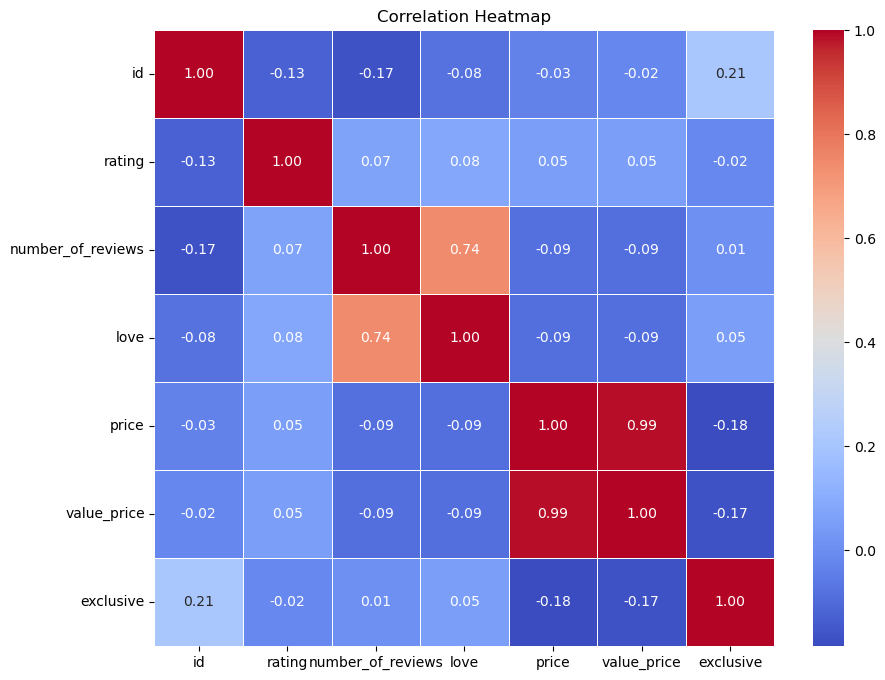

In [78]:
# Mengambil subset data numerik untuk membuat heatmap
numeric_data = product_exc[['id','rating', 'number_of_reviews', 'love', 'price','value_price','exclusive']]

# Menghitung korelasi antar fitur
correlation_matrix = numeric_data.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [79]:
# Assuming 'product_exc' is your DataFrame
numeric_data = product_exc[['id', 'rating', 'number_of_reviews', 'love', 'price', 'value_price', 'exclusive']]

# Impute missing values with the median of each column
imputer = SimpleImputer(strategy='median')
numeric_data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = numeric_data_imputed.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_data_imputed.values, i) for i in range(numeric_data_imputed.shape[1])]

# Display the VIF DataFrame
print(vif_data)

# Calculate correlation matrix
correlation_matrix = numeric_data_imputed.corr()

            Variable        VIF
0                 id  13.690906
1             rating  13.845562
2  number_of_reviews   2.487240
3               love   2.591358
4              price  70.572847
5        value_price  69.457074
6          exclusive   1.462115


In [80]:
# Pairplot menggunakan scatter matrix
fig = px.scatter_matrix(product_exc, dimensions=['rating', 'number_of_reviews', 'love', 'price', 'value_price'], color='category')
fig.update_layout(title='Pairplot untuk Fitur Numerik', width=1000, height=1000)
fig.show()

## A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
Interpretasi :

* Kolom exclusive memiliki korelasi negatif yang rendah dengan rating (-0.02) dan number_of_reviews (0.01).

* Korelasi dengan fitur lain seperti love, price, dan value_price hampir nol, menunjukkan tidak ada hubungan linier yang signifikan.

* Tidak ada fitur yang menunjukkan korelasi kuat dengan label exclusive, jadi tidak ada fitur yang secara khusus perlu dipertahankan berdasarkan korelasi ini saja.

## B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?

Interpretasi :

* Correlation Heatmap
  * price dan value_price memiliki korelasi yang sangat tinggi (0.99)menunjukkan bahwa satu nilai hampir dapat diprediksi dari yang lain.
  * Korelasi lainnya antara fitur-fitur lain sangat rendah, menunjukkan
  tidak ada hubungan linier yang kuat di antara mereka.


* The Variance Inflation Factor (VIF)
  * Fitur price dan value_price menunjukkan multikolinearitas yang sangat tinggi dan harus diprioritaskan untuk dihapus atau ditransformasi untuk meningkatkan kinerja model.
  * id dan rating juga menunjukkan multikolinearitas tinggi dan mungkin perlu disesuaikan atau dihapus.
  * Fitur lainnya memiliki multikolinearitas yang dapat diterima atau rendah dan kemungkinan tidak memerlukan tindakan segera.


* PairPlot
  * Menunjukkan beberapa pola distribusi dan hubungan antara fitur-fitur numerik.
  * Tidak ada pola menarik lainnya yang terlihat selain korelasi tinggi antara price dan value_price.

# 4. DATA CLEANSING

Lakukan pembersihan data, sesuai yang diajarkan di kelas, seperti:
* A. Handle missing values
* B. Handle duplicated data
* C. Handle outliers
* D. Feature transformation
* E. Feature encoding
* F. Handle class imbalance
Di laporan homework, tuliskan apa saja yang telah dilakukan dan metode yang digunakan.

Tetap tuliskan jika memang ada tidak yang perlu di-handle (contoh: “Tidak perlu feature
encoding karena semua feature sudah numerical” atau “Outlier tidak di-handle karena akan
fokus menggunakan model yang robust terhadap outlier”)

## A. Handle Missing Values

In [81]:
from sklearn.impute import SimpleImputer

# Pastikan kolom 'category' ada dalam DataFrame
category_imputer = SimpleImputer(strategy='most_frequent')

# Imputasi nilai yang hilang dalam kolom 'category'
product_exc['category'] = category_imputer.fit_transform(product_exc[['category']]).ravel()

# Imputasi 'number_of_reviews', 'love', 'price', 'value_price' dengan median
median_imputer = SimpleImputer(strategy='median')
product_exc[['number_of_reviews', 'love', 'price','rating', 'value_price']] = median_imputer.fit_transform(product_exc[['number_of_reviews', 'love', 'price','rating', 'value_price']])

Interpretasi :
* Kolom category mengandung nilai yang hilang diisi dengan modus (kategori yang paling umum).
* Kolom number_of_reviews, love, price, rating, dan value_price mengandung nilai yang hilang diisi dengan median, karena distribusi yang sangat miring.

## B. Handle Duplicated Data

In [82]:
# pengecekan data duplikat
duplicated_data = product_exc.duplicated().any()

if duplicated_data == True:
    print('Terdapat data duplikat')
else:
    print('Tidak terdapat data duplikat')

Tidak terdapat data duplikat


Interpretasi :     
* Tidak terdapat data duplikat pada dataset ini



## C. Handle Outilers

In [84]:
columns = ['rating', 'number_of_reviews', 'love', 'price', 'value_price']

for col in columns:
    # Hitung kuartil 1 (Q1), kuartil 3 (Q3), dan IQR
    Q1 = product_exc[col].quantile(0.25)
    Q3 = product_exc[col].quantile(0.75)
    IQR = Q3 - Q1

    # Identifikasi batas bawah dan atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi outlier
    outliers = product_exc[(product_exc[col] < lower_bound) | (product_exc[col] > upper_bound)].index

    # Hapus outlier dari dataset
    product_exc = product_exc.drop(outliers)

Interpretasi :

Disini dilakukan penghapusan nilai outlier dengan menggunakan metode IQR dari beberapa kolom yaitu number_of_reviews, love, price, dan value_price.

## D. Feature Transformation

In [85]:
# menggunakan transformasi log untuk mengurangi kemiringan distribusi
product_exc['number_of_reviews'] = product_exc['number_of_reviews'].apply(lambda x: np.log1p(x))
product_exc['love'] = product_exc['love'].apply(lambda x: np.log1p(x))
product_exc['price'] = product_exc['price'].apply(lambda x: np.log1p(x))
product_exc['value_price'] = product_exc['value_price'].apply(lambda x: np.log1p(x))

Dengan menggunakan transformasi log dapat mengurangi kemiringan dari distribusi kolom number_of_reviews, love, price, dan value price.

## E. Feature Encoding

In [87]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# menghapus label atau target
X = product_exc.drop(columns=['exclusive'])

# mengelompokkan kolom berdasarkan tipe data
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# membuat columntransformer untuk menghandel kolom numerik dan kategorik
# menggunakan one-hot-encoding untuk mengubah kolom category dan brand menjadi numerik
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# membuat preproccessing pipeline guna untuk menyatukan langkah pre-processing
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

Dengan menggunakan metode one hot encoding dapat merubah kolom kategorik menjadi numerik. Pemilihan one hot encoding karena fitur memiliki banyak kategori dan bukan ordinal, sehingga lebih cocok menggunakan one hot encoding.

## F. Handle class imbalance

In [88]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Handle class imbalance using SMOTE
X = product_exc.drop(columns=['exclusive'])
y = product_exc['exclusive']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the preprocessing pipeline to the training set
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_transformed, y_train)

# Display the cleaned data
product_exc_cleaned_info = product_exc.info()
product_exc_cleaned_description = product_exc.describe(include='all').T
product_exc_cleaned_head = product_exc.head()

product_exc_cleaned_description

<class 'pandas.core.frame.DataFrame'>
Index: 4308 entries, 0 to 7998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4308 non-null   int64  
 1   brand              4308 non-null   object 
 2   category           4308 non-null   object 
 3   rating             4308 non-null   float64
 4   number_of_reviews  4308 non-null   float64
 5   love               4308 non-null   float64
 6   price              4308 non-null   float64
 7   value_price        4308 non-null   float64
 8   exclusive          4308 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 336.6+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,4308.0,NaN,NaN,NaN,1948481.989786,352807.988441,50.0,1814899.5,2047781.0,2194527.75,2293793.0
brand,4308,288,SEPHORA COLLECTION,283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,4308,137,Moisturizers,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,4308.0,NaN,NaN,NaN,4.214949,0.444756,3.5,4.0,4.0,4.5,5.0
number_of_reviews,4308.0,NaN,NaN,NaN,3.358128,1.205431,0.693147,2.484907,3.401197,4.304065,5.583496
love,4308.0,NaN,NaN,NaN,7.908686,1.6332,0.0,7.438972,8.188967,8.867991,9.752723
price,4308.0,NaN,NaN,NaN,3.496039,0.554901,1.098612,3.218876,3.496508,3.89182,4.574711
value_price,4308.0,NaN,NaN,NaN,3.508995,0.559028,1.098612,3.218876,3.496508,3.912023,4.521789
exclusive,4308.0,NaN,NaN,NaN,0.26091,0.439182,0.0,0.0,0.0,1.0,1.0


Kolom exclusive menunjukkan ketidakseimbangan kelas dengan lebih banyak produk yang tidak eksklusif, maka untuk mengatasi masalah Imbalance Class dapat dengan menggunakan Oversampling pada kelas minoritas menggunakan SMOTE (Synthetic Minority Over-sampling Technique) jika diperlukan dalam analisis lebih lanjut.

# 5. FEATURE ENGINEERING

Cek feature yang ada sekarang, lalu lakukan:
* A. Feature selection (membuang feature yang kurang relevan atau redundan)
* B. Feature extraction (membuat feature baru dari feature yang sudah ada)
* C. Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang
mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya
ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya
dan tidak perlu diimplementasikan)
** Untuk 2A & 2B, tetap tuliskan jika memang tidak bisa dilakukan (contoh: “Semua feature
digunakan untuk modelling (tidak ada yang dihapus), karena semua feature relevan”)

## A. Feature Selection

In [89]:
# menghapus fitur value_price karena korelasi yang tinggi dengan price dan id karena kurang relevan
product_exc.drop(columns=[['value_price','id']])

KeyError: "[('value_price', 'id')] not found in axis"

## B. Feature Extraction

In [90]:
# membuat fitur 'log_reviews_per_rating'
product_exc['log_reviews_per_rating'] = np.log1p(product_exc['number_of_reviews']) / product_exc['rating']

# membuat fitur 'price_to_rating'
product_exc['price_to_rating'] = product_exc['price'] / product_exc['rating']

# membuat fitur 'is_high_end'
mean_price = product_exc['price'].mean()
product_exc['is_high_end'] = product_exc['price'].apply(lambda x: 1 if x > mean_price else 0)

* Interpretasi Fitur baru :
  * log_reviews_per_rating -> Fitur baru yang menghitung log dari ulasan per rating dengan rumus: log_reviews_per_rating = log(number_of_reviews) / rating.
  * price_to_rating -> Fitur baru yang mengukur rasio harga terhadap rating dengan rumus: price_to_rating = price / rating.
  * is_high_end -> Fitur biner baru yang menunjukkan apakah produk memiliki harga di atas rata-rata (is_high_end = 1 jika price > mean(price)).

## C. Feature Tambahan
Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang
mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya
ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya
dan tidak perlu diimplementasikan)

Rekomendasi Empat Fitur Tambahan
  * Popularity Index: Indeks popularitas berdasarkan kombinasi love, number_of_reviews, dan rating.
  * Time on Market: Fitur yang menunjukkan berapa lama produk telah berada di pasar.
  * Seasonal Demand: Fitur yang menunjukkan apakah produk cenderung lebih populer di musim-musim tertentu.
  * Customer Loyalty: Fitur yang menunjukkan tingkat loyalitas pelanggan berdasarkan frekuensi pembelian ulang.

# KESIMPULAN


Dokumen ini menyajikan analisis data produk eksklusif yang bertujuan untuk memahami karakteristik produk dan faktor-faktor yang mempengaruhi popularitas dan nilai produk. Berikut adalah kesimpulan yang dapat ditarik dari analisis:

1. Kualitas Data:

Data memiliki beberapa missing values pada kolom penting seperti kategori, rating, jumlah ulasan, love, harga, dan value_price. Hal ini perlu ditangani sebelum melakukan pemodelan prediktif.
Tipe data dan penamaan kolom sudah sesuai, menunjukkan kualitas data yang baik secara umum.
2. Distribusi Data:

Sebagian besar produk menerima rating tinggi (4 dan 5), menunjukkan kepuasan pelanggan yang tinggi.
Mayoritas produk memiliki jumlah ulasan yang rendah, tetapi ada beberapa produk yang sangat populer dan menerima banyak ulasan.
Distribusi harga dan value_price menunjukkan bahwa kebanyakan produk memiliki harga dan nilai yang rendah, tetapi ada beberapa produk dengan harga dan nilai yang sangat tinggi.
3. Korelasi Antar Fitur:

Terdapat korelasi positif yang kuat antara jumlah ulasan dan love, menunjukkan bahwa produk yang lebih banyak diulas cenderung lebih disukai.
Korelasi positif antara harga dan value_price menunjukkan bahwa produk yang lebih mahal cenderung memiliki nilai yang lebih tinggi.
Tidak ada korelasi yang kuat antara rating dan fitur lainnya, menunjukkan bahwa rating mungkin tidak dipengaruhi oleh faktor-faktor lain seperti harga atau jumlah ulasan.
4. Analisis Multivariat:

Heatmap korelasi dan pairplot menunjukkan hubungan antar fitur numerik.
Analisis kategori menunjukkan distribusi brand dan kategori produk, dengan beberapa brand dan kategori yang lebih dominan daripada yang lain.
Rekomendasi untuk Data Pre-processing:

Penanganan Missing Values: Missing values pada kolom penting perlu ditangani dengan metode yang sesuai, seperti imputasi atau penghapusan baris data.
Penanganan Outliers: Outliers pada fitur numerik seperti jumlah ulasan, love, harga, dan value_price perlu ditangani untuk menghindari bias dalam pemodelan.
Encoding Fitur Kategorikal: Fitur kategorikal seperti brand dan kategori perlu diubah menjadi bentuk numerik agar dapat digunakan dalam pemodelan.

Analisis data ini memberikan wawasan berharga tentang karakteristik produk eksklusif. Hasil analisis dapat digunakan untuk mengembangkan strategi pemasaran yang lebih efektif, mengoptimalkan harga produk, dan meningkatkan kepuasan pelanggan. Pemodelan prediktif dapat dilakukan untuk memprediksi popularitas atau nilai produk berdasarkan fitur-fitur yang relevan.